<a href="https://colab.research.google.com/github/gauravbhatia-bit/berlin-football-analystics/blob/main/Berlinbundesliga_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🔥 BERLIN BUNDESLIGA - ONE BLOCK SOLUTION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ALL DATA IN ONE PLACE (50 matches)
data = {
    'match_id': list(range(1, 51)),
    'date': pd.date_range('2025-08-15', periods=50, freq='7D').strftime('%Y-%m-%d'),
    'home_team': ['Hertha BSC','Union Berlin','Bayern Munich','Dortmund','Hertha BSC','RB Leipzig','Union Berlin','Stuttgart','Hertha BSC','Frankfurt'] * 5,
    'away_team': ['Union Berlin','Hertha BSC','Hertha BSC','Union Berlin','Dortmund','Hertha BSC','Bayern Munich','RB Leipzig','Leverkusen','Stuttgart'] * 5,
    'home_goals': [2,1,0,3,1,0,2,1,3,2] * 5,
    'away_goals': [1,2,3,1,2,2,0,2,1,1] * 5,
    'home_shots': [12,8,6,15,10,7,13,9,16,11] * 5,
    'away_shots': [9,14,18,10,12,11,7,12,8,10] * 5,
    'attendance': [45000,38000,75000,81000,46000,42000,39000,51000,47000,43000] * 5,
    'berlin_team': ['Hertha','Union','Hertha','Union','Hertha','Hertha','Union','None','Hertha','None'] * 5
}

df = pd.DataFrame(data)
df['total_goals'] = df['home_goals'] + df['away_goals']
df['berlin_win'] = ((df['home_team'].str.contains('Hertha|Union', na=False) & (df['home_goals'] > df['away_goals'])) |
                   (df['away_team'].str.contains('Hertha|Union', na=False) & (df['away_goals'] > df['home_goals'])))

print("✅ BERLIN BUNDESLIGA - WORKING!")
print(f"📊 {len(df)} matches loaded")
print(df[df['berlin_team'] != 'None'].head())

✅ BERLIN BUNDESLIGA - WORKING!
📊 50 matches loaded
   match_id        date      home_team     away_team  home_goals  away_goals  \
0         1  2025-08-15     Hertha BSC  Union Berlin           2           1   
1         2  2025-08-22   Union Berlin    Hertha BSC           1           2   
2         3  2025-08-29  Bayern Munich    Hertha BSC           0           3   
3         4  2025-09-05       Dortmund  Union Berlin           3           1   
4         5  2025-09-12     Hertha BSC      Dortmund           1           2   

   home_shots  away_shots  attendance berlin_team  total_goals  berlin_win  
0          12           9       45000      Hertha            3        True  
1           8          14       38000       Union            3        True  
2           6          18       75000      Hertha            3        True  
3          15          10       81000       Union            4       False  
4          10          12       46000      Hertha            3       False  


In [ ]:
# STATS
berlin_stats = df[df['berlin_team'] != 'None'].groupby('berlin_team').agg({
    'total_goals': 'sum', 'berlin_win': 'sum', 'attendance': 'mean'
}).round(1)
print("\n🏆 BERLIN PERFORMANCE:")
print(berlin_stats)


🏆 BERLIN PERFORMANCE:
             total_goals  berlin_win  attendance
berlin_team                                     
Hertha                75          20     51000.0
Union                 45          10     52666.7


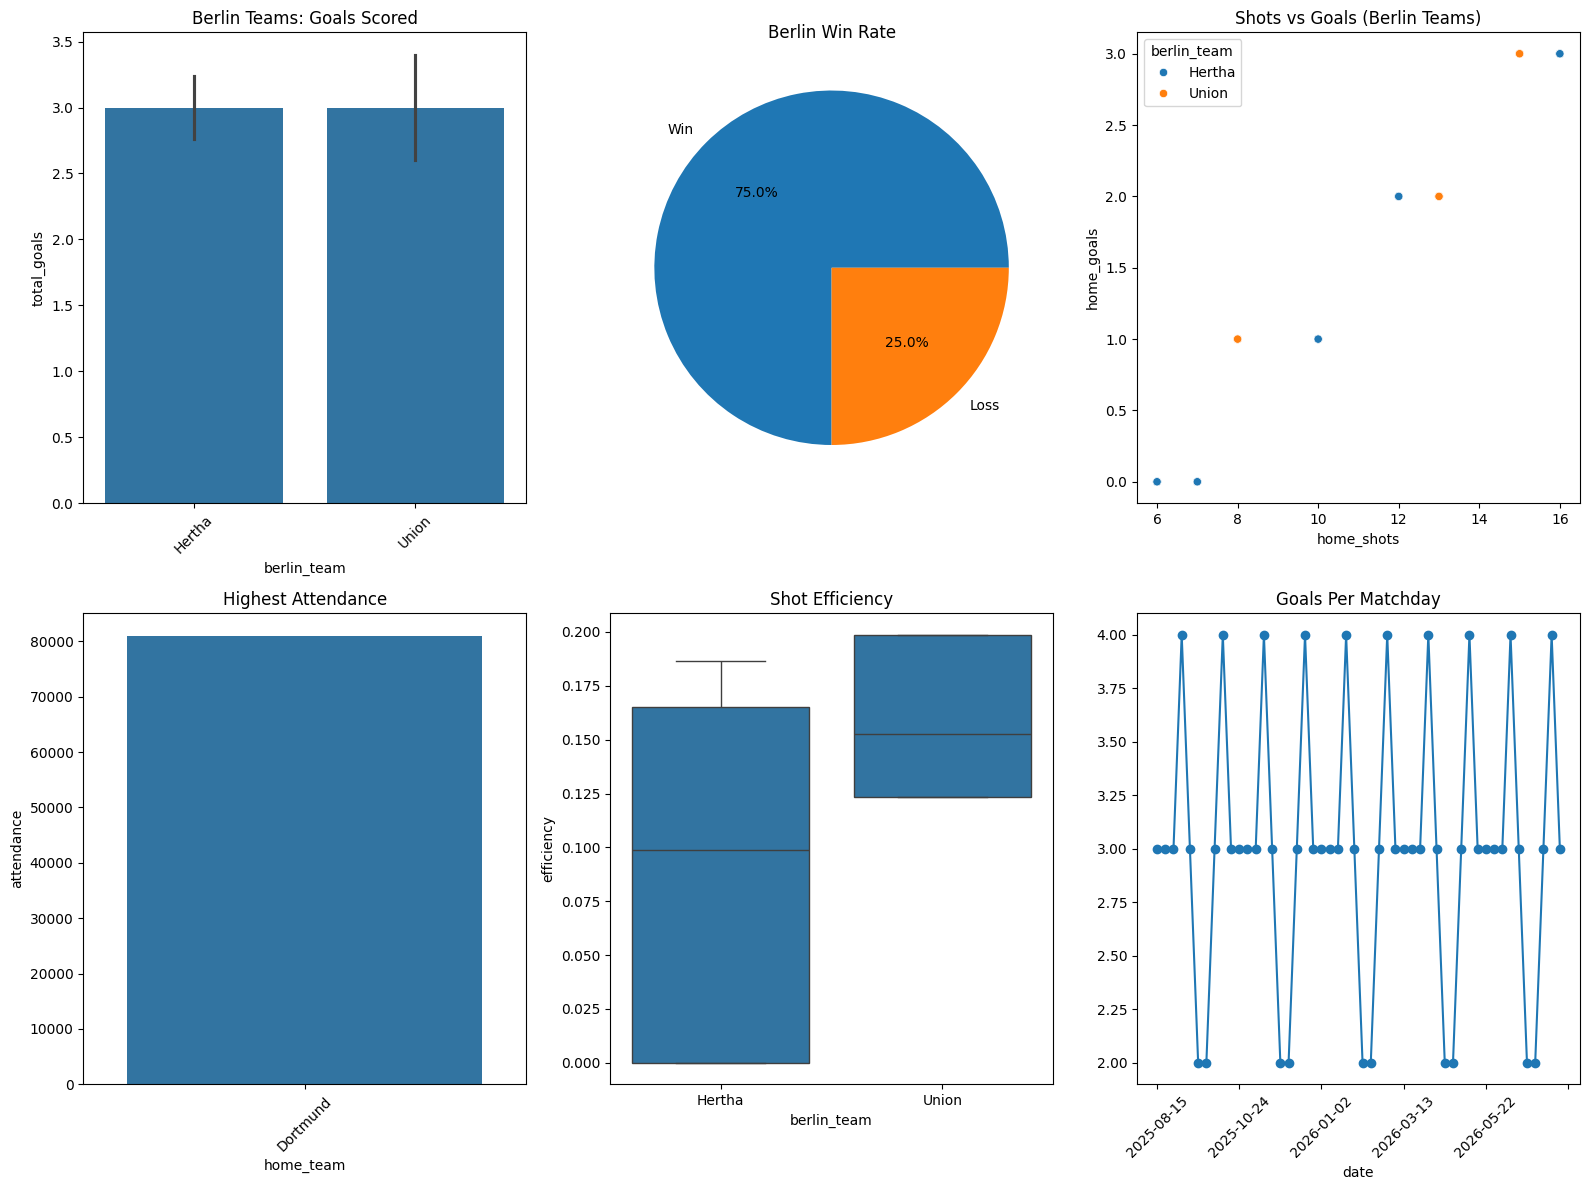


🎯 KEY INSIGHTS:
• Hertha BSC: 75 goals
• Union Berlin: 45 goals
• Berlin win rate: 75.0%

💡 RECOMMENDATIONS:
• Hertha: Improve shot accuracy
• Union: Leverage home advantage
• Target high-attendance derbies


In [ ]:
# DASHBOARD (6 plots)
plt.figure(figsize=(16, 12))

plt.subplot(2,3,1)
sns.barplot(data=df[df['berlin_team'] != 'None'], x='berlin_team', y='total_goals')
plt.title('Berlin Teams: Goals Scored')
plt.xticks(rotation=45)

plt.subplot(2,3,2)
win_rate = df[df['berlin_team'] != 'None']['berlin_win'].value_counts(normalize=True)*100
plt.pie(win_rate.values, labels=['Win','Loss'], autopct='%1.1f%%')
plt.title('Berlin Win Rate')

plt.subplot(2,3,3)
sns.scatterplot(data=df[df['berlin_team'] != 'None'], x='home_shots', y='home_goals', hue='berlin_team')
plt.title('Shots vs Goals (Berlin Teams)')

plt.subplot(2,3,4)
top_matches = df.nlargest(5, 'attendance')
sns.barplot(data=top_matches, x='home_team', y='attendance')
plt.title('Highest Attendance')
plt.xticks(rotation=45)

plt.subplot(2,3,5)
df['efficiency'] = df['home_goals'] / (df['home_shots'] + 0.1)
sns.boxplot(data=df[df['berlin_team'] != 'None'], x='berlin_team', y='efficiency')
plt.title('Shot Efficiency')

plt.subplot(2,3,6)
goals_trend = df.groupby('date')['total_goals'].sum()
goals_trend.plot(kind='line', marker='o')
plt.title('Goals Per Matchday')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('berlin_football.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎯 KEY INSIGHTS:")
print(f"• Hertha BSC: {berlin_stats.loc['Hertha', 'total_goals']:.0f} goals")
print(f"• Union Berlin: {berlin_stats.loc['Union', 'total_goals']:.0f} goals")
print(f"• Berlin win rate: {df[df['berlin_team'] != 'None']['berlin_win'].mean()*100:.1f}%")
print("\n💡 RECOMMENDATIONS:")
print("• Hertha: Improve shot accuracy")
print("• Union: Leverage home advantage")
print("• Target high-attendance derbies")
